# Chapter 6: Diagnostics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline
%precision 5

'%.5f'

## Check Error Assumptions

Read in the data for the example:

In [2]:
savings = pd.read_csv("data/savings.csv",index_col=0)
savings.head()

,sr,pop15,pop75,dpi,ddpi
Australia,11.43,29.35,2.87,2329.68,2.87
Austria,12.07,23.32,4.41,1507.99,3.93
Belgium,13.17,23.80,4.43,2108.47,3.82
Bolivia,5.75,41.89,1.67,189.13,0.22
Brazil,12.88,42.19,0.83,728.47,4.56


In [3]:
lmod = smf.ols(formula='sr ~ pop15 + pop75 + dpi + ddpi', data=savings).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sr   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     5.756
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           0.000790
Time:                        16:37:19   Log-Likelihood:                -135.10
No. Observations:                  50   AIC:                             280.2
Df Residuals:                      45   BIC:                             289.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.5661      7.355      3.884      0.000      13.753      43.379
pop15         -0.4612      0.145     -3.189      0.003      -0.753      -0.170
pop75         -1.6915      1.084     -1.561      0.126      -3.874       0.491
dpi           -0.0003      0.001     -0.362      0.719      -0.002       0.002
ddpi           0.4097      0.196      2.088      0.042       0.015       0.805
==============================================================================
Omnibus:                        0.866   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.493
Skew:                           0.241   Prob(JB):                        0.782
Kurtosis:                       3.064   Cond. No.                     2.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The simple residual-fitted plot:

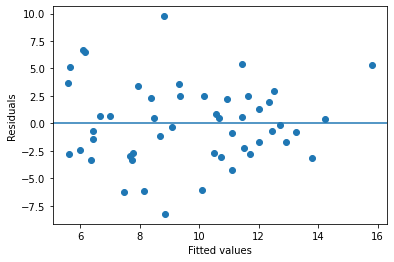

In [4]:
plt.scatter(lmod.fittedvalues, lmod.resid)
plt.ylabel("Residuals")
plt.xlabel("Fitted values")
plt.axhline(0)

This plot is slightly better for checking for constant variance:

Text(0.5, 0, 'Fitted values')

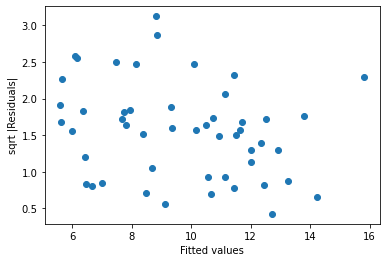

In [5]:
plt.scatter(lmod.fittedvalues, np.sqrt(abs(lmod.resid)))
plt.ylabel("sqrt |Residuals|")
plt.xlabel("Fitted values")

Check that there is no significant relationship:

In [6]:
ddf = pd.DataFrame({'x':lmod.fittedvalues,'y':np.sqrt(abs(lmod.resid))})
dmod = smf.ols('y ~ x',data=ddf).fit()
dmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     3.117
Date:                Tue, 23 Jun 2020   Prob (F-statistic):             0.0838
Time:                        16:37:20   Log-Likelihood:                -47.153
No. Observations:                  50   AIC:                             98.31
Df Residuals:                      48   BIC:                             102.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1622      0.348      6.215      0.000       1.463       2.862
x             -0.0614      0.035     -1.766      0.084      -0.131       0.009
==============================================================================
Omnibus:                        1.170   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                1.184
Skew:                           0.273   Prob(JB):                        0.553
Kurtosis:                       2.479   Cond. No.                         39.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Simulate some residual-fitted plots:

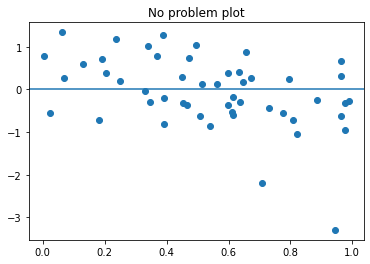

In [7]:
n = 50
x = np.random.sample(n)
y = np.random.normal(size=n)
plt.scatter(x,y)
plt.title("No problem plot")
plt.axhline(0)

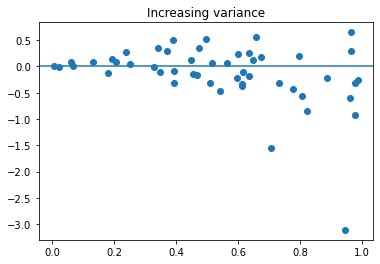

In [8]:
plt.scatter(x,y*x)
plt.title("Increasing variance")
plt.axhline(0)

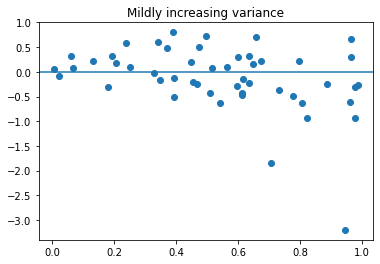

In [9]:
plt.scatter(x,y*np.sqrt(x))
plt.title("Mildly increasing variance")
plt.axhline(0)

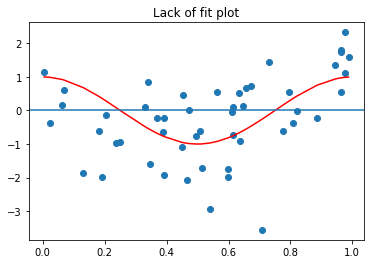

In [10]:
y = np.cos(2*x*np.pi) + np.random.normal(size=n)
plt.scatter(x,y)
plt.title("Lack of fit plot")
sx = np.sort(x)
plt.plot(sx,np.cos(2*sx*np.pi),c='red')
plt.axhline(0)

Plots of residuals against predictors:

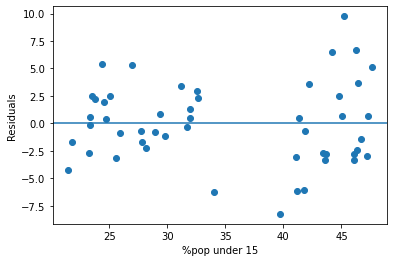

In [11]:
plt.scatter(savings.pop15, lmod.resid)
plt.xlabel("%pop under 15")
plt.ylabel("Residuals")
plt.axhline(0)

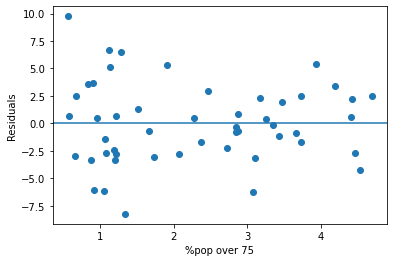

In [12]:
plt.scatter(savings.pop75, lmod.resid)
plt.xlabel("%pop over 75")
plt.ylabel("Residuals")
plt.axhline(0)

Check for equality of the variances in the two groups seen in pop15

In [13]:
numres = lmod.resid[savings.pop15 > 35]
denres = lmod.resid[savings.pop15 < 35]
fstat = np.var(numres,ddof=1)/np.var(denres,ddof=1)
2*(1-sp.stats.f.cdf(fstat,len(numres)-1,len(denres)-1))

0.013575950424159933

Do the residual fitted plot for the Galapagos data:

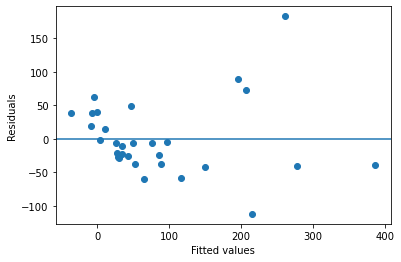

In [14]:
gala = pd.read_csv("data/gala.csv")
gmod = smf.ols(formula='Species ~ Area + Elevation + Nearest + Scruz  + Adjacent', data=gala).fit()
plt.scatter(gmod.fittedvalues, gmod.resid)
plt.ylabel("Residuals")
plt.xlabel("Fitted values")
plt.axhline(0)

See how transformation improves the plot:

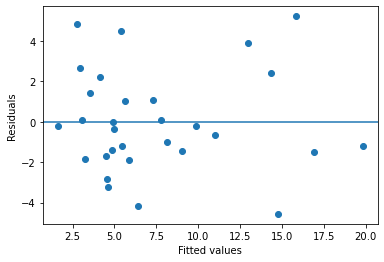

In [15]:
gmod = smf.ols(formula='np.sqrt(Species) ~ Area + Elevation + Nearest + Scruz  + Adjacent', data=gala).fit()
plt.scatter(gmod.fittedvalues, gmod.resid)
plt.ylabel("Residuals")
plt.xlabel("Fitted values")
plt.axhline(0)

Check the QQ plot of the residuals. Plot is assigned to foo so it doesn't print twice.

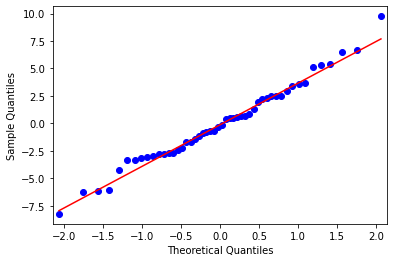

In [16]:
foo = sm.qqplot(lmod.resid, line="q")

Histogram is not a good way to check:

Text(0.5, 0, 'Residuals')

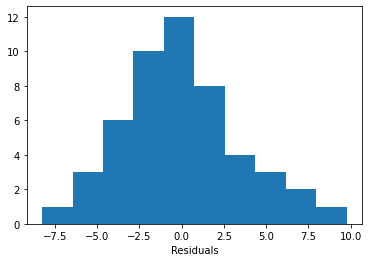

In [17]:
plt.hist(lmod.resid)
plt.xlabel("Residuals")

Generate some random QQ plots from known distributions:

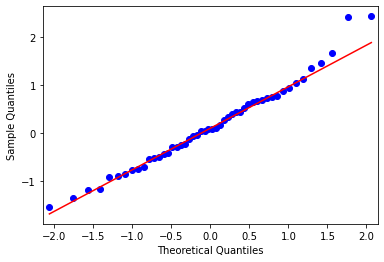

In [18]:
foo = sm.qqplot(np.random.normal(size=50),line="q")

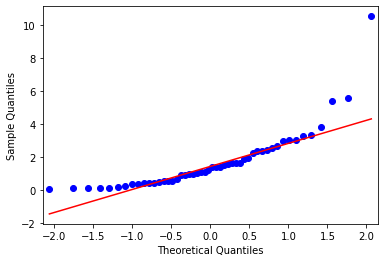

In [19]:
foo = sm.qqplot(np.exp(np.random.normal(size=50)),line="q")

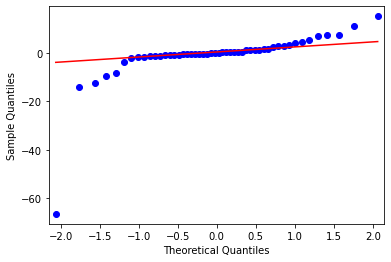

In [20]:
foo = sm.qqplot(np.random.standard_t(1,size=50),line="q")

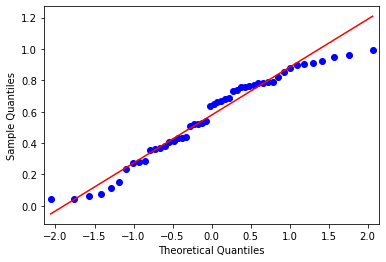

In [21]:
foo = sm.qqplot(np.random.sample(size=50),line="q")

Do the Shapiro test - second value is the p-value

In [22]:
sp.stats.shapiro(lmod.resid)

(0.98698, 0.85240)

## Correlated Errors

In [23]:
globwarm = pd.read_csv("data/globwarm.csv")
globwarm.head()

,nhtemp,wusa,jasper,westgreen,chesapeake,tornetrask,urals,mongolia,tasman,year
0,NaN,-0.66,-0.03,0.03,-0.66,0.33,-1.49,0.83,-0.12,1000
1,NaN,-0.63,-0.07,0.09,-0.67,0.21,-1.44,0.96,-0.17,1001
2,NaN,-0.60,-0.11,0.18,-0.67,0.13,-1.39,0.99,-0.22,1002
3,NaN,-0.55,-0.14,0.30,-0.68,0.08,-1.34,0.95,-0.26,1003
4,NaN,-0.51,-0.15,0.41,-0.68,0.06,-1.30,0.87,-0.31,1004


In [24]:
lmod = smf.ols(formula='nhtemp ~ wusa + jasper + westgreen + chesapeake + tornetrask + urals + mongolia + tasman',
               data=globwarm).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 nhtemp   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     15.47
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           5.03e-16
Time:                        16:37:23   Log-Likelihood:                 50.995
No. Observations:                 145   AIC:                            -83.99
Df Residuals:                     136   BIC:                            -57.20
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2426      0.027     -8.980      0.000      -0.296      -0.189
wusa           0.0774      0.043      1.803      0.074      -0.008       0.162
jasper        -0.2288      0.078     -2.929      0.004      -0.383      -0.074
westgreen      0.0096      0.042      0.229      0.819      -0.073       0.092
chesapeake    -0.0321      0.034     -0.943      0.347      -0.099       0.035
tornetrask     0.0927      0.045      2.057      0.042       0.004       0.182
urals          0.1854      0.091      2.027      0.045       0.005       0.366
mongolia       0.0420      0.046      0.917      0.361      -0.049       0.133
tasman         0.1155      0.030      3.834      0.000       0.056       0.175
==============================================================================
Omnibus:                       12.501   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.388
Skew:                           0.490   Prob(JB):                     0.000168
Kurtosis:                       4.384   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

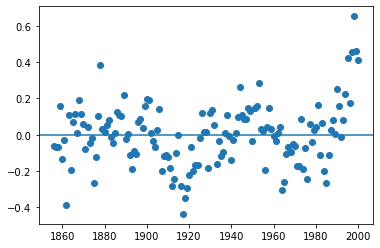

In [25]:
plt.scatter(globwarm.year[lmod.resid.keys()], lmod.resid)
plt.axhline(0)

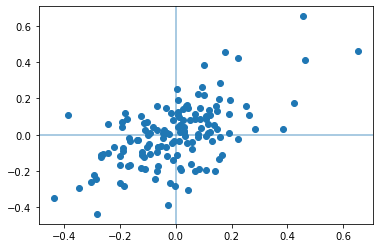

In [26]:
plt.scatter(lmod.resid.iloc[:-1],lmod.resid.iloc[1:])
plt.axhline(0,alpha=0.5)
plt.axvline(0,alpha=0.5)

This is the statistic. P-values do not seem to be available. 2 is considered null but less than 1 is a sign of a problem.

In [27]:
sm.stats.stattools.durbin_watson(lmod.resid)

0.8166063726402724

## Finding Unusual Observations

In [28]:
lmod = smf.ols(formula='sr ~ pop15 + pop75 + dpi + ddpi', data=savings).fit()
diagv = lmod.get_influence()
hatv = pd.Series(diagv.hat_matrix_diag, savings.index)
hatv.head()

Australia    0.067713
Austria      0.120384
Belgium      0.087482
Bolivia      0.089471
Brazil       0.069559
dtype: float64

Make the half-normal plot:

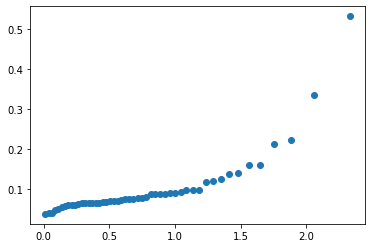

In [29]:
n=50
ix = np.arange(1,n+1)
halfq = sp.stats.norm.ppf((n+ix)/(2*n+1)),
plt.scatter(halfq, np.sort(hatv))

Should tag these on the plot

In [30]:
hatv.sort_values().iloc[-5:]

South Rhodesia    0.160809
Ireland           0.212236
Japan             0.223310
United States     0.333688
Libya             0.531457
dtype: float64

One of the built-in plots. Not sure about residuals^2 as a diagnostic.

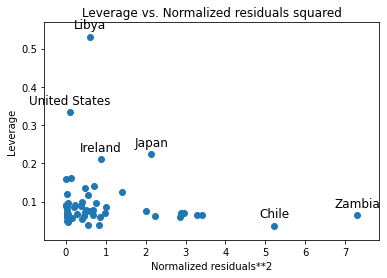

In [31]:
foo = sm.graphics.plot_leverage_resid2(lmod)

Would prefer R style plot here.

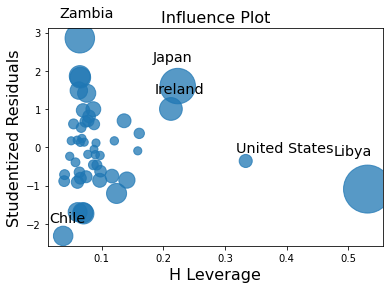

In [32]:
foo = sm.graphics.influence_plot(lmod)

Make a QQ plot of the Pearson residuals. These are not the same as the standardised residuals in R.

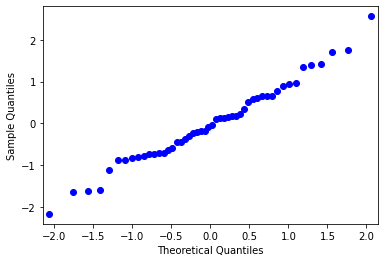

In [33]:
foo = sm.qqplot(lmod.resid_pearson)

Make the example plots with outliers. (Seems like this could be done more neatly)

In [34]:
np.random.seed(123)
testdata = pd.DataFrame({'x' : np.arange(1,11), 'y' : np.arange(1,11) + np.random.normal(size=10)})
p1 = pd.DataFrame({'x': [5.5], 'y':[12]})
alldata = testdata.append(p1,ignore_index=True)

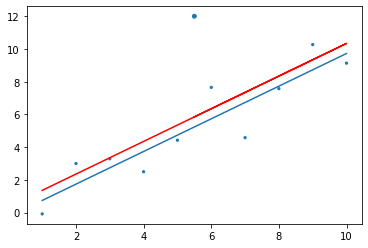

In [35]:
marksize = np.ones(11)
marksize[10] = 3
plt.scatter(alldata.x, alldata.y, s= marksize*5)
slope, intercept = np.polyfit(testdata.x, testdata.y,1)
plt.plot(testdata.x, intercept + slope * testdata.x)
slope, intercept = np.polyfit(alldata.x, alldata.y,1)
plt.plot(alldata.x, intercept + slope * alldata.x, color='red')

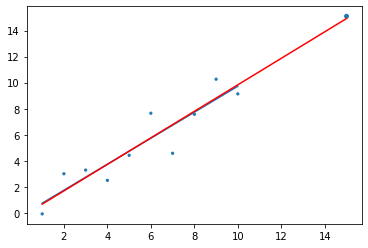

In [36]:
p1 = pd.DataFrame({'x': [15], 'y':[15.1]})
alldata = testdata.append(p1,ignore_index=True)
plt.scatter(alldata.x, alldata.y, s= marksize*5)
slope, intercept = np.polyfit(testdata.x, testdata.y,1)
plt.plot(testdata.x, intercept + slope * testdata.x)
slope, intercept = np.polyfit(alldata.x, alldata.y,1)
plt.plot(alldata.x, intercept + slope * alldata.x, color='red')

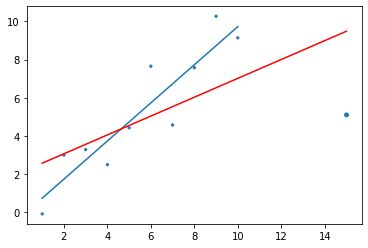

In [37]:
p1 = pd.DataFrame({'x': [15], 'y':[5.1]})
alldata = testdata.append(p1,ignore_index=True)
plt.scatter(alldata.x, alldata.y, s= marksize*5)
slope, intercept = np.polyfit(testdata.x, testdata.y,1)
plt.plot(testdata.x, intercept + slope * testdata.x)
slope, intercept = np.polyfit(alldata.x, alldata.y,1)
plt.plot(alldata.x, intercept + slope * alldata.x, color='red')

Create the studentized residuals

In [38]:
stud = pd.Series(diagv.resid_studentized_external, savings.index)
(pd.Series.idxmax(abs(stud)), np.max(abs(stud)))

('Zambia', 2.8535583382284377)

Find the Bonferroni-adjusted critical value:

In [39]:
sp.stats.t.ppf(0.05/(2*50),44)

-3.525801306486005

Star example that has multiple outliers:

In [40]:
star = pd.read_csv("data/star.csv")
star.head()

,temp,light
0,4.37,5.23
1,4.56,5.74
2,4.26,4.93
3,4.56,5.74
4,4.30,5.19


Put the line on the plot:

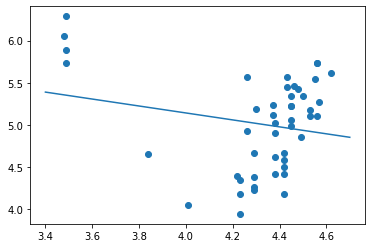

In [41]:
lmod = smf.ols(formula='light ~ temp',data=star).fit()
plt.scatter(star.temp, star.light)
plt.plot([3.4, 4.7], [lmod.params[0] + lmod.params[1]*3.4, lmod.params[0] + lmod.params[1]*4.7])

Look for outliers:

In [42]:
stud = lmod.get_influence().resid_studentized_external
np.min(stud), np.max(stud)

(-2.049392729378057, 1.905847201766315)

Fit the line without the four points:

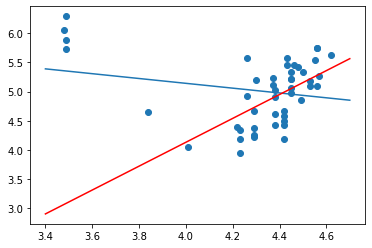

In [43]:
lmodr = smf.ols(formula='light ~ temp',data=star[star.temp > 3.6]).fit()
plt.scatter(star.temp, star.light)
plt.plot([3.4, 4.7], [lmod.params[0] + lmod.params[1]*3.4, lmod.params[0] + lmod.params[1]*4.7])
plt.plot([3.4, 4.7], [lmodr.params[0] + lmodr.params[1]*3.4, lmodr.params[0] + lmodr.params[1]*4.7],color='red')

## Influential observations

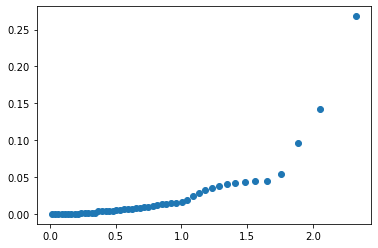

In [44]:
lmod = smf.ols(formula='sr ~ pop15 + pop75 + dpi + ddpi', data=savings).fit()
diagv = lmod.get_influence()
cooks = pd.Series(diagv.cooks_distance[0], savings.index)
n=50
ix = np.arange(1,n+1)
halfq = sp.stats.norm.ppf((n+ix)/(2*n+1)),
plt.scatter(halfq, np.sort(cooks))

Would be best placed on the plot.

In [45]:
cooks.sort_values().iloc[-5:]

Philippines    0.045221
Ireland        0.054396
Zambia         0.096633
Japan          0.142816
Libya          0.268070
dtype: float64

First column is the all data estimates and second is one without largest cook stat.

In [46]:
lmodi = smf.ols(formula='sr ~ pop15 + pop75 + dpi + ddpi', data=savings[cooks < 0.2]).fit()
pd.DataFrame({'with':lmod.params,'without':lmodi.params})

,with,without
Intercept,28.566087,24.524046
pop15,-0.461193,-0.391440
pop75,-1.691498,-1.280867
dpi,-0.000337,-0.000319
ddpi,0.409695,0.610279


Would be better to autodetect extreme cases and label them. Note that dfbetas is the change in standard errors and not the change in coefficient as in R.

Text(48, -0.48324393377926284, 'Libya')

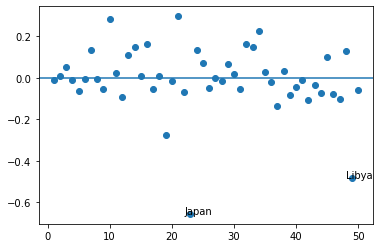

In [47]:
p15d = diagv.dfbetas[:,1]
plt.scatter(np.arange(1,51),p15d)
plt.axhline(0)
ix = 22
plt.annotate(savings.index[ix],(ix, p15d[ix]))
ix = 48
plt.annotate(savings.index[ix],(ix, p15d[ix]))

# Checking the structure of the model
Partial regression plot

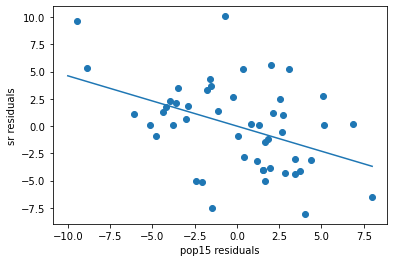

In [48]:
d = smf.ols(formula='sr ~ pop75 + dpi + ddpi', data=savings).fit().resid
m = smf.ols(formula='pop15 ~ pop75 + dpi + ddpi', data=savings).fit().resid
plt.scatter(m,d)
plt.xlabel("pop15 residuals")
plt.ylabel("sr residuals")
plt.plot([-10,8], [-10*lmod.params[1], 8*lmod.params[1]])

Partial residual plot

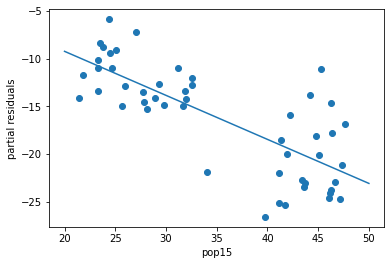

In [49]:
pr = lmod.resid + savings.pop15*lmod.params[1]
plt.scatter(savings.pop15, pr)
plt.xlabel("pop15")
plt.ylabel("partial residuals")
plt.plot([20,50], [20*lmod.params[1], 50*lmod.params[1]])

In [50]:
smf.ols(formula='sr ~ pop15 + pop75 + dpi + ddpi', data=savings[savings.pop15 > 35]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sr   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.8302
Date:                Tue, 23 Jun 2020   Prob (F-statistic):              0.523
Time:                        16:37:26   Log-Likelihood:                -64.176
No. Observations:                  23   AIC:                             138.4
Df Residuals:                      18   BIC:                             144.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4340     21.155     -0.115      0.910     -46.879      42.011
pop15          0.2739      0.439      0.624      0.541      -0.649       1.197
pop75         -3.5485      3.033     -1.170      0.257      -9.921       2.824
dpi            0.0004      0.005      0.084      0.934      -0.010       0.011
ddpi           0.3955      0.290      1.363      0.190      -0.214       1.005
==============================================================================
Omnibus:                        1.851   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                1.540
Skew:                           0.497   Prob(JB):                        0.463
Kurtosis:                       2.213   Cond. No.                     8.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
smf.ols(formula='sr ~ pop15 + pop75 + dpi + ddpi', data=savings[savings.pop15 < 35]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sr   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     5.663
Date:                Tue, 23 Jun 2020   Prob (F-statistic):            0.00273
Time:                        16:37:26   Log-Likelihood:                -63.072
No. Observations:                  27   AIC:                             136.1
Df Residuals:                      22   BIC:                             142.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.9618      8.084      2.964      0.007       7.197      40.726
pop15         -0.3859      0.195     -1.975      0.061      -0.791       0.019
pop75         -1.3277      0.926     -1.434      0.166      -3.248       0.593
dpi           -0.0005      0.001     -0.634      0.533      -0.002       0.001
ddpi           0.8844      0.295      2.994      0.007       0.272       1.497
==============================================================================
Omnibus:                        0.363   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.834   Jarque-Bera (JB):                0.396
Skew:                          -0.241   Prob(JB):                        0.820
Kurtosis:                       2.654   Cond. No.                     3.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Plot the young and old groups with different colors:

Text(0, 0.5, 'sr')

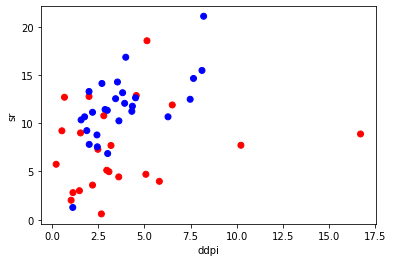

In [52]:
savings['age'] = np.where(savings.pop15 > 35, 'red', 'blue')
plt.scatter(savings.ddpi, savings.sr, color=savings.age)
plt.xlabel("ddpi")
plt.ylabel("sr")

Would be nice to have a legend but `matplotlib` does not make this easy. Fortunately, `seaborn` makes this more convenient:

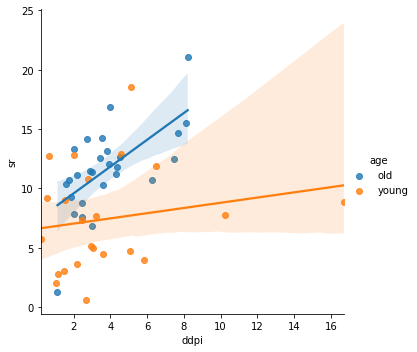

In [53]:
savings['age'] = np.where(savings.pop15 > 35, 'young', 'old')
sns.lmplot('ddpi','sr',data=savings, hue='age')

Can facet this also:

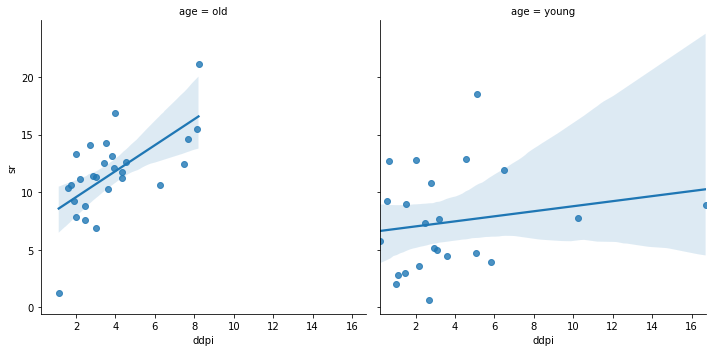

In [54]:
sns.lmplot('ddpi','sr',data=savings, col='age')